In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:

# Load the image
img = cv2.imread('face0.jpg')


In [ ]:

# Load the face and eye cascade classifiers
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


In [ ]:

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:

# Detect faces in the grayscale image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=5,
    minSize=(30, 30)
)


In [ ]:

# Loop over each detected face
for (x, y, w, h) in faces:
    # Draw a rectangle around the face
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 0), 2)
    cv2.putText(img, 'face', (x + 10, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

    # Get the region of interest (ROI) for the face in grayscale and color images
    face_gray = gray[y:y+h, x:x+w]
    face_color = img[y:y+h, x:x+w]

    # Detect eyes in the face region
    eyes = eyeCascade.detectMultiScale(
        face_gray,
        scaleFactor=1.1,
        minNeighbors=10,
        minSize=(10, 10)
    )

    # Loop over each detected eye and draw a rectangle around it
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(face_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)


In [ ]:

# Convert the BGR image to RGB format
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)




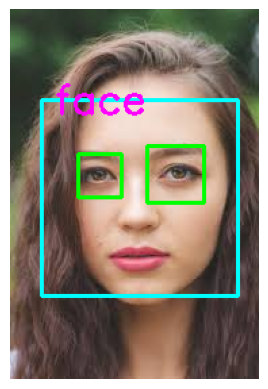

In [ ]:
# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()